In [1]:
import model_functions as mf
from tensorflow import keras


# import tensorflow as tf

# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         # Currently, memory growth needs to be the same across GPUs
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Memory growth must be set before GPUs have been initialized
#         print(e)

2023-12-04 13:40:12.189894: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 13:40:12.189946: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 13:40:12.189960: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-04 13:40:12.194139: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-04 13:40:14.137754: I tensorflow/compiler/

In [ ]:
model, history = mf.load_model("model_01122023-02:52:19")

In [2]:
model, history, history_fine_tuned = mf.train_new_model_fine_tuning(
    200, 
    data_augmentation_config=mf.create_data_augmentation_config(), 
    loss=keras.losses.CategoricalFocalCrossentropy(from_logits=False), 
    optimizer2=keras.optimizers.Adam(learning_rate=0.0015, weight_decay=0.0001)
)

2023-12-04 13:40:16.312876: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


Epoch 1/5


2023-12-04 13:40:21.309022: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-12-04 13:40:22.038303: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-04 13:40:25.017579: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f972817c810 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-04 13:40:25.017617: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2023-12-04 13:40:25.021196: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-04 13:40:25.069099: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


711/711 [==============================] - 352s 482ms/step - loss: 0.4198 - top_k_categorical_accuracy: 0.7442 - one_hot_mean_io_u: 0.0372 - categorical_accuracy: 0.5589 - val_loss: 0.3525 - val_top_k_categorical_accuracy: 0.7951 - val_one_hot_mean_io_u: 0.0621 - val_categorical_accuracy: 0.5842
Epoch 2/5
711/711 [==============================] - 344s 484ms/step - loss: 0.3582 - top_k_categorical_accuracy: 0.7912 - one_hot_mean_io_u: 0.0628 - categorical_accuracy: 0.5956 - val_loss: 0.3480 - val_top_k_categorical_accuracy: 0.8021 - val_one_hot_mean_io_u: 0.0686 - val_categorical_accuracy: 0.5805
Epoch 3/5
711/711 [==============================] - 337s 474ms/step - loss: 0.3375 - top_k_categorical_accuracy: 0.8063 - one_hot_mean_io_u: 0.0760 - categorical_accuracy: 0.6085 - val_loss: 0.3173 - val_top_k_categorical_accuracy: 0.8248 - val_one_hot_mean_io_u: 0.0855 - val_categorical_accuracy: 0.6018
Epoch 4/5
711/711 [==============================] - 337s 475ms/step - loss: 0.3228 - top

2023-12-04 14:08:41.387746: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.66GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-12-04 14:08:41.387805: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.66GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


711/711 [==============================] - 355s 474ms/step - loss: 0.3119 - top_k_categorical_accuracy: 0.8271 - one_hot_mean_io_u_1: 0.0982 - categorical_accuracy: 0.6273 - val_loss: 0.2957 - val_top_k_categorical_accuracy: 0.8433 - val_one_hot_mean_io_u_1: 0.1079 - val_categorical_accuracy: 0.6189
Epoch 2/2
711/711 [==============================] - 339s 476ms/step - loss: 0.2866 - top_k_categorical_accuracy: 0.8472 - one_hot_mean_io_u_1: 0.1183 - categorical_accuracy: 0.6500 - val_loss: 0.2801 - val_top_k_categorical_accuracy: 0.8539 - val_one_hot_mean_io_u_1: 0.1200 - val_categorical_accuracy: 0.6340


In [3]:
mf.save_model(model, history_fine_tuned)

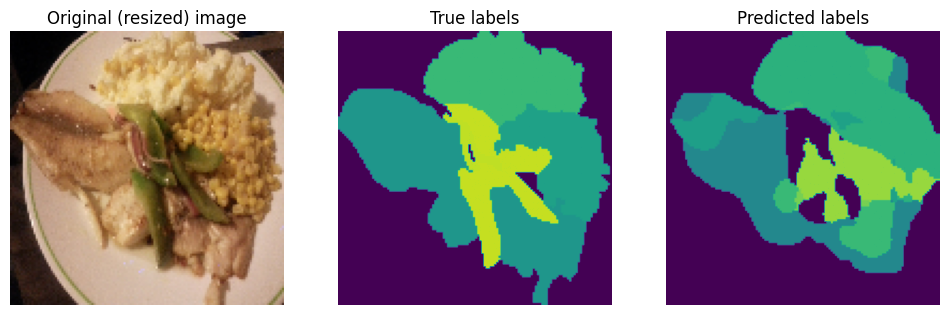

In [8]:
mf.display_prediction(model, 8)

In [9]:
history.history

{'loss': [0.4197675883769989,
  0.35823655128479004,
  0.3375104069709778,
  0.32282477617263794,
  0.31122615933418274],
 'top_k_categorical_accuracy': [0.7442228198051453,
  0.7911640405654907,
  0.8062560558319092,
  0.8185979127883911,
  0.8271858096122742],
 'one_hot_mean_io_u': [0.037175778299570084,
  0.06283564865589142,
  0.07602736353874207,
  0.08722705394029617,
  0.09953571856021881],
 'categorical_accuracy': [0.5588728189468384,
  0.5955524444580078,
  0.6085401177406311,
  0.6199448704719543,
  0.6288628578186035],
 'val_loss': [0.3524778485298157,
  0.348019003868103,
  0.317305326461792,
  0.3138744831085205,
  0.308207243680954],
 'val_top_k_categorical_accuracy': [0.7950617074966431,
  0.8020934462547302,
  0.8248160481452942,
  0.8268007636070251,
  0.8335306644439697],
 'val_one_hot_mean_io_u': [0.06209048256278038,
  0.06857315450906754,
  0.08548813313245773,
  0.09399454295635223,
  0.09878021478652954],
 'val_categorical_accuracy': [0.5842497944831848,
  0.5804